<code>plot_S2S_model_bias.ipynb</code>.  This notebook plots bias (model - obs) in sea ice extent for each S2S model as a function of forecast month and region. 

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from S2S_sea_ice_plotting import VRILE_count_plot

## Overview

Plot SIE model bias as a function of forecast valid month and model for each region.  Select a period of lead times to average over

In [6]:
obs_name = ['NSIDC_0079','NSIDC_0051']
COMMON_RF = True # we want to compare the reforecasts to obs over the same 15 year period
MAX_LEAD = 1 #max lead in days

In [8]:
if COMMON_RF == True:
    time_str = 'COMMON_RF'
fname_load = '../DATA/RAW_ERRORS_all_S2S_models_OBS_{obs_name}_{time_str}.csv'.format(obs_name=obs_name[0],time_str=time_str)
SIE_err = pd.read_csv(fname_load)

KeyboardInterrupt: 

Trim to lead days less than or equal to <code>MAX_LEAD</code>

In [16]:
SIE_err = SIE_err.replace('metreofr','meteofr')

In [17]:
SIE_err_lead = SIE_err[pd.to_timedelta(SIE_err['lead time (days)']).isin([pd.Timedelta(i,'D') for i in range(MAX_LEAD+1)])]

In [18]:
SIE_err_lead_reg = SIE_err_lead.set_index('region')

In [19]:
SIE_err_lead_reg.index.unique()

Index(['Atlantic', 'Baffin Bay', 'Barents Sea', 'Barents-Kara-Laptev Sea',
       'Beaufort Sea', 'Bering', 'Canadian Islands', 'Central Arctic',
       'Chukchi Sea', 'East Greenland Sea', 'East Siberian Sea',
       'East Siberian-Beaufort-Chukchi Sea',
       'East Siberian-Beaufort-Chukchi-Laptev Sea', 'Hudson Bay', 'Kara Sea',
       'Kara-Laptev Sea', 'Laptev Sea', 'Sea of Okhotsk', 'St John',
       'panArctic'],
      dtype='object', name='region')

In [20]:
import seaborn as sns
reg_sel_all = ['panArctic','Central Arctic','East Siberian-Beaufort-Chukchi Sea','Kara-Laptev Sea','Barents Sea',
               'East Greenland Sea']
#SIE_err_ireg = SIE_err_lead_reg.xs(reg_choose)
#SIE_pv_plt = pd.pivot_table(SIE_err_ireg,values='SIE',columns='valid month',index='model name',aggfunc=np.mean)
reg_sel_all[1]

'Central Arctic'

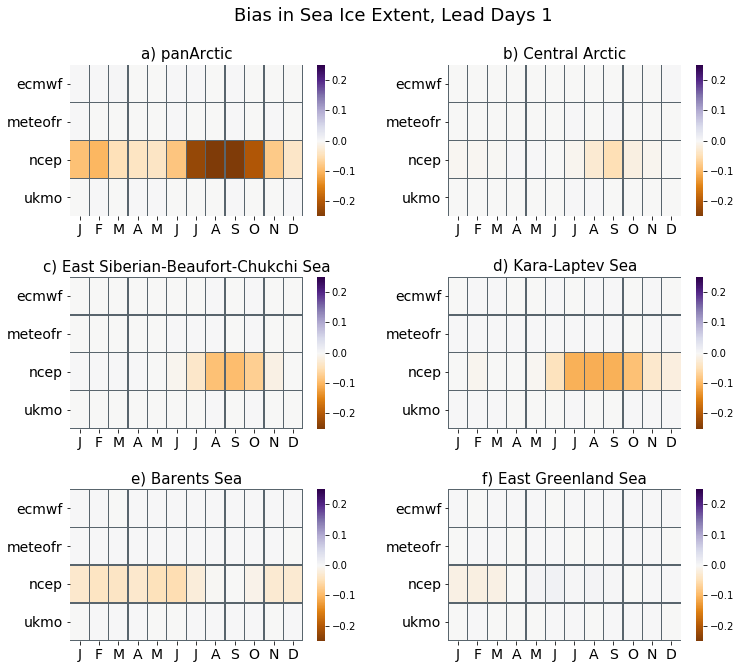

In [21]:
no_rows = 3
no_cols = 2
TO_PLOT = 'SIE anom'
TO_PLOT_str = 'SIE_anom'
mon_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
letters = ['a)','b)','c)','d)','e)','f)']
fig1,ax = plt.subplots(no_rows,no_cols,figsize=(12,10))#,sharex=True,sharey=True)
for imod in np.arange(0,len(reg_sel_all)):
#imod=0
    region_sel = reg_sel_all[imod]
    #region_sel = 'panArctic'
    plt_test = SIE_err_lead_reg.loc[region_sel]
    piv_plt = pd.pivot_table(data=plt_test,index='model name',columns='valid month',values=TO_PLOT,aggfunc=np.mean)
    #
    ax_sel = ax.flat[imod]
    #cbar_ax = fig.add_axes([.965,.3,.03,.4])
    if (TO_PLOT == 'SIE pct') | (TO_PLOT == 'SIE clim pct'):
        if region_sel == 'panArctic':
            [vmin,vmax] = [-15,5]
        elif region_sel == 'Barents Sea':
            [vmin,vmax] = [-40,40]
        else:
            [vmin,vmax] = [-25,25]
    elif (TO_PLOT == 'SIE') | (TO_PLOT == 'SIE clim'):
        if region_sel == 'panArctic':
            [vmin,vmax] = [-1.5,0.5]
        #elif region_sel == 'Barents Sea':
         #   [vmin,vmax] = [-0.6,0.60]
        else:
            [vmin,vmax] = [-0.5,0.5]
            
    else:
        [vmin,vmax] = [-0.25,0.25]
    sns.heatmap(piv_plt,cmap = 'PuOr',ax=ax_sel,linewidth=0.2,linecolor='xkcd:slate grey',
                vmin=vmin,vmax=vmax,center=0)
    ax_sel.set_yticklabels(piv_plt.index,rotation=0,fontsize=14)
    ax_sel.set_xticklabels(mon_labels,fontsize=14,rotation=0)
    ax_sel.set_ylabel(None)
    ax_sel.set_xlabel(None)
    ax_sel.set_title('{lett} {region}'.format(lett=letters[imod],region=region_sel),fontsize=15)
    if (TO_PLOT == 'SIE') | (TO_PLOT == 'SIE clim'):
        ax_sel.collections[0].colorbar.set_label('10$^6$ km$^2$',rotation=0,fontsize=13,y=-0.04,labelpad=-20)
    elif (TO_PLOT == 'SIE pct') | (TO_PLOT == 'SIE clim pct'):
        ax_sel.collections[0].colorbar.set_label('%',rotation=0,fontsize=13,y=-0.04,labelpad=-20)
    #
    fig1.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
    fig1.suptitle('Bias in Sea Ice Extent, Lead Days {max_lead}'.format(max_lead=MAX_LEAD),fontsize=18)
    
fname_save = '../FIGURES/Bias_v_month_{TO_PLOT_str}_MAX_LEAD_{MAX_LEAD}_OBS_{obs_name}.pdf'.format(TO_PLOT_str=TO_PLOT_str,
                                                                            MAX_LEAD=MAX_LEAD,obs_name=obs_name)
fig1.savefig(fname_save,format='pdf',bbox_inches='tight')